# Distortion Algorithms

## Sine Soft-Clipping

Values between the range of $-\frac 1 n$ and $\frac 1 n$ are used in a sine function, others are simply capped at positive and negative 1.

### Formula

$$
y_\text{sine}\left(x\right)=
\begin{Bmatrix}
   \operatorname{abs}\left(x\right)\le\frac{1}{n}: & \sin\left(\frac{x\pi}{2}n\right), \\
   \operatorname{abs}\left(x\right)\ge\frac{1}{n}: & \operatorname{sgn}\left(x\right) \\
\end{Bmatrix}
$$

### Implementation

In [120]:
def sine_dist(x, n):
  if(abs(x) <= 1 / n):
    return math.sin((x * math.pi) / 2 * n)
  else:
    return sign(x)

### Graphs

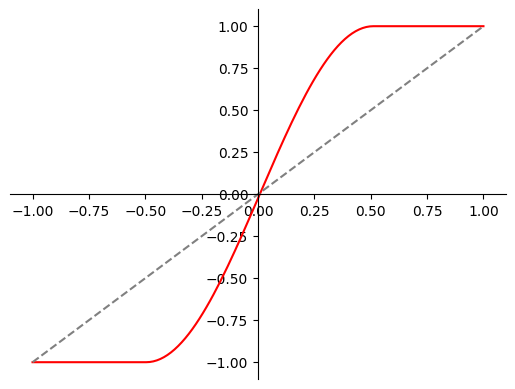

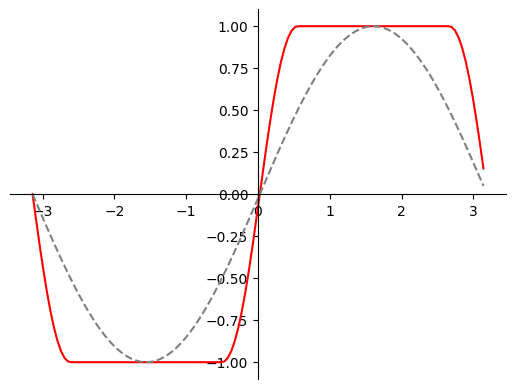

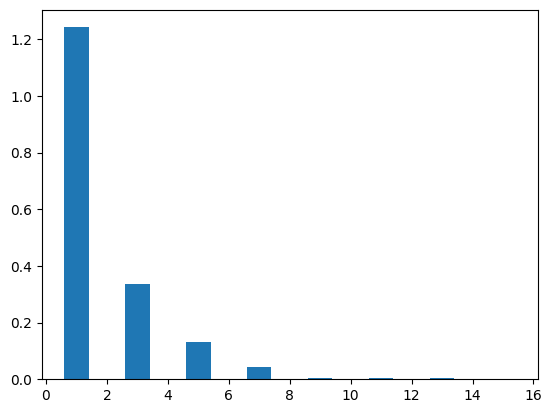

In [121]:
display_curve(sine_dist)
display_wave(sine_dist)
display_frequencies(sine_dist)

## Display functions (ignore)

In [122]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
import math

fftsamples = 32

sign = lambda x: (1, -1)[x<0]

def display_curve(func):
  x = np.linspace(-1,1,128)
  y = np.linspace(-1,1,128)

  for i in range(0, 128):
    y[i] = func(i / 64 - 1, 2)

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  plt.plot(x, y, color='red')
  plt.plot(x, x, color='gray', linestyle='dashed')

  plt.show()

def display_wave(func):
  x = np.linspace(-math.pi,math.pi,128)
  y = np.linspace(-math.pi,math.pi,128)
  o = np.linspace(-math.pi,math.pi,128)

  for i in range(0, 128):
    y[i] = func(math.sin((i / 64 - 1) * math.pi), 2)
    o[i] = math.sin((i / 64 - 1) * math.pi)

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  plt.plot(x, y, color='red')
  plt.plot(x, o, color='gray', linestyle='dashed')

  plt.show()

def display_frequencies(func):
  x = np.linspace(-math.pi,math.pi,fftsamples)
  y = np.linspace(-math.pi,math.pi,fftsamples)
  o = np.linspace(-math.pi,math.pi,fftsamples)

  for i in range(0, fftsamples):
    y[i] = func(math.sin((i / (fftsamples / 2) - 1) * math.pi), 2)
    o[i] = math.sin((i / (fftsamples / 2) - 1) * math.pi)
  
  fd = fft(y)
  fq = np.linspace(0, fftsamples // 2 - 1, fftsamples//2)
  plt.bar(fq[1:], 2.0/fftsamples * np.abs(fd[:fftsamples//2][1:]))
  plt.show()